In [381]:
%load_ext autoreload
%autoreload 2
import numpy as np
from Environment import Dealer, BlackjackEnv
from agent import QLearningAgent, ReinforceAgent
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

global_number_episodes = 50000


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Watkins Q-Learning Agent 

For the case where the number of decks used to deal is infinite, We can make use of Watkins Q-Learning. This is a temporal difference method. 

The general method is as follows: 

1. An initial Q-table is created, giving hit and stick for all the hand values as equal (all have an initial Q-value of 0)
2. a hand is played, the Q-values are updated according the the update rule after each card is drawn. (Reward is only given after the hand is over is the player doesnt bust)
3. steps 1 and 2 are repeated and the Q_table is updated until the Q_values converge.
4. The learned Q-table is then the policy that the agent has learned to maximise its reward per-hand. 

Q update rule:
 $$Q(S,A) \to (1-\alpha)Q(S,A) + \alpha[R + \gamma \max_{a}Q(S',a)]$$

 In this case we can set the discount factor $\gamma$ = 1, as we are only interested in the reward after the hand has been played. $\alpha$ is the learning rate. 

The Q-values in the table represent the expected reward for a hand given a specific action and state. For example if the Q-value for hitting when the hand value is 13 is 153.2, the exepected or average reward for a hand given hitting on 13 is 153.2

Testing the Q learning agent for an infinite deck of cards 

In [382]:
#initialize agent for Q-learning
env = BlackjackEnv(D=np.inf)
q_agent = QLearningAgent(env, alpha=0.1, gamma=1)

In [383]:
average_reward_01 = q_agent.learn(num_episodes=global_number_episodes,epsilon=0.1,decay_epsilon=False)
print(f'Average reward after {global_number_episodes} episodes for epsilon=0.1: ', average_reward_01)
print('Learned Q values: ', q_agent.Q_values)

env = BlackjackEnv(D=np.inf)
q_agent_01 = QLearningAgent(env, alpha=0.1, gamma=1)

average_reward_01 = q_agent_01.learn(num_episodes=global_number_episodes,epsilon=0.1,decay_epsilon=False)
print(f'Average reward after {global_number_episodes} episodes for epsilon=0.1: ', average_reward_01)
print('Learned Q values: ', q_agent_01.Q_values)
env = BlackjackEnv(D=np.inf)
q_agent = QLearningAgent(env, alpha=0.1, gamma=1)

average_reward_001 = q_agent.learn(num_episodes=global_number_episodes,epsilon=0.01,decay_epsilon=False)
print(f'Average reward after {global_number_episodes} episodes for epsilon=0.01: ', average_reward_001)
print('Learned Q values: ', q_agent.Q_values)

env = BlackjackEnv(D=np.inf)
q_agent = QLearningAgent(env, alpha=0.1, gamma=1)

average_reward_03 = q_agent.learn(num_episodes=global_number_episodes,epsilon=0.3,decay_epsilon=False)
print(f'Average reward after {global_number_episodes} episodes for epsilon=0.3: ', average_reward_03)
print('Learned Q values: ', q_agent.Q_values)

Episode 100 completed (0.20%). Moving Average Reward: 192.79
Episode 200 completed (0.40%). Moving Average Reward: 243.81
Episode 300 completed (0.60%). Moving Average Reward: 246.81
Episode 400 completed (0.80%). Moving Average Reward: 258.71
Episode 500 completed (1.00%). Moving Average Reward: 251.77
Episode 600 completed (1.20%). Moving Average Reward: 263.07
Episode 700 completed (1.40%). Moving Average Reward: 255.24
Episode 800 completed (1.60%). Moving Average Reward: 265.91
Episode 900 completed (1.80%). Moving Average Reward: 255.38
Episode 1000 completed (2.00%). Moving Average Reward: 263.27
Episode 1100 completed (2.20%). Moving Average Reward: 244.88
Episode 1200 completed (2.40%). Moving Average Reward: 238.94
Episode 1300 completed (2.60%). Moving Average Reward: 233.31
Episode 1400 completed (2.80%). Moving Average Reward: 243.45
Episode 1500 completed (3.00%). Moving Average Reward: 245.38
Episode 1600 completed (3.20%). Moving Average Reward: 270.93
Episode 1700 comp

Visualise learnd policy (q-values)

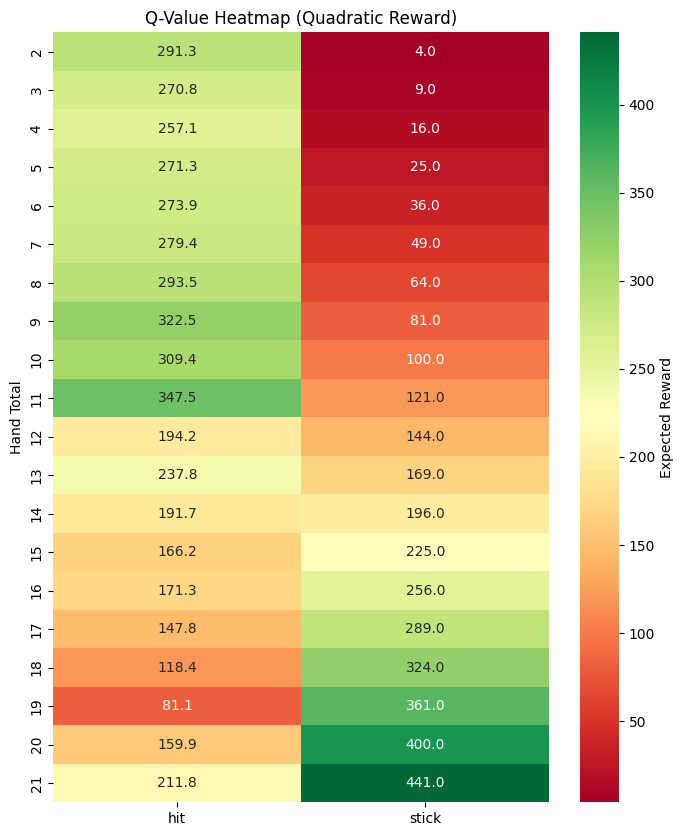

In [384]:
df = pd.Series(q_agent_01.Q_values).unstack()

df.index.name = 'Hand Total'
df = df.sort_index()

plt.figure(figsize=(8, 10))
sns.heatmap(df, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': 'Expected Reward'})
plt.title("Q-Value Heatmap (Quadratic Reward)")
plt.show()

Visualise the learning process:

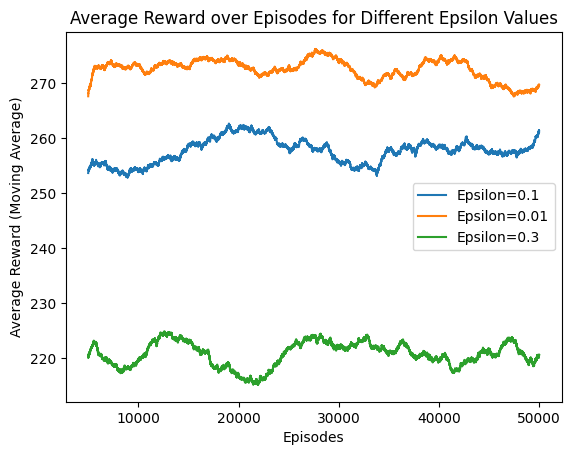

In [385]:
window_size = global_number_episodes // 10
weights = np.ones(window_size) / window_size

moving_avg_01 = np.convolve(average_reward_01, weights, mode='valid')
moving_avg_001 = np.convolve(average_reward_001, weights, mode='valid')
moving_avg_03 = np.convolve(average_reward_03, weights, mode='valid')

episodes = np.arange(window_size, len(average_reward_01) + 1)



plt.plot(episodes, moving_avg_01, label='Epsilon=0.1')
plt.plot(episodes, moving_avg_001, label='Epsilon=0.01')
plt.plot(episodes, moving_avg_03, label='Epsilon=0.3')
plt.xlabel('Episodes')
plt.ylabel('Average Reward (Moving Average)')
plt.title('Average Reward over Episodes for Different Epsilon Values')
plt.legend()

With a static epsilon, we see the reward increase jumping around and not reaching a very good level. To improve this we can introduce an epsilon decay throughout the learning process. This way the model can explore all the states often early in the training and as it learns what is effective it will explore less. 

We can use an exponential decay to decay $\epsilon$ from $\epsilon_{upper} = 1$ to $\epsilon_{lower} = 0.01$ during the training. 

$$\epsilon = \epsilon_{lower} + (\epsilon_{upper}-\epsilon_{lower})\exp(-5\frac{\text{episode iteratation}}{\text{total episodes}})$$

In [386]:
#initialize agent for Q-learning
env = BlackjackEnv(D=np.inf)
q_agent_edec = QLearningAgent(env, alpha=0.1, gamma=1)

In [387]:
q_agent_edec.env.reset_deck()
episode_reward = q_agent_edec.play_hand_q_learning()
print('reward after one episode: ',episode_reward)
print('Q values: ', q_agent_edec.Q_values)

average_reward_edec = q_agent_edec.learn(num_episodes=global_number_episodes,decay_epsilon=True)
print(f'Average reward after {global_number_episodes} episodes with decaying epsilon: ', average_reward_edec)
print('Learned Q values: ', q_agent_edec.Q_values)

reward after one episode:  9
Q values:  {(2, 'hit'): 500, (2, 'stick'): 500, (3, 'hit'): 500, (3, 'stick'): 450.9, (4, 'hit'): 500, (4, 'stick'): 500, (5, 'hit'): 500, (5, 'stick'): 500, (6, 'hit'): 500, (6, 'stick'): 500, (7, 'hit'): 500, (7, 'stick'): 500, (8, 'hit'): 500, (8, 'stick'): 500, (9, 'hit'): 500, (9, 'stick'): 500, (10, 'hit'): 500, (10, 'stick'): 500, (11, 'hit'): 500, (11, 'stick'): 500, (12, 'hit'): 500, (12, 'stick'): 500, (13, 'hit'): 500, (13, 'stick'): 500, (14, 'hit'): 500, (14, 'stick'): 500, (15, 'hit'): 500, (15, 'stick'): 500, (16, 'hit'): 500, (16, 'stick'): 500, (17, 'hit'): 500, (17, 'stick'): 500, (18, 'hit'): 500, (18, 'stick'): 500, (19, 'hit'): 500, (19, 'stick'): 500, (20, 'hit'): 500, (20, 'stick'): 500, (21, 'hit'): 500, (21, 'stick'): 500}
Episode 100 completed (0.20%). Moving Average Reward: 119.29
Episode 200 completed (0.40%). Moving Average Reward: 127.57
Episode 300 completed (0.60%). Moving Average Reward: 117.35
Episode 400 completed (0.80%).

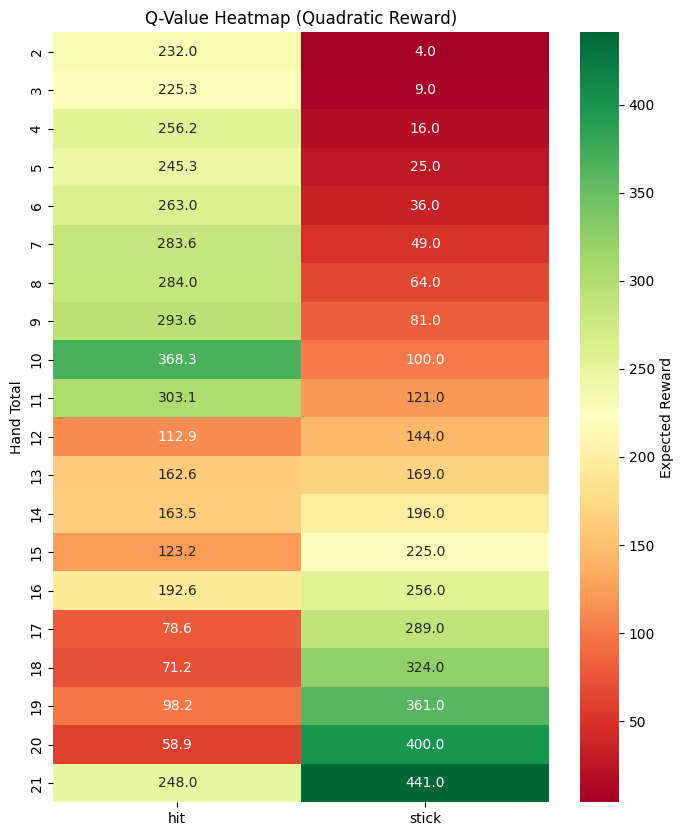

In [388]:
df = pd.Series(q_agent_edec.Q_values).unstack()

df.index.name = 'Hand Total'
df = df.sort_index()

plt.figure(figsize=(8, 10))
sns.heatmap(df, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': 'Expected Reward'})
plt.title("Q-Value Heatmap (Quadratic Reward)")
plt.show()

Text(0.5, 1.0, 'Q-Learning Agent Training Performance')

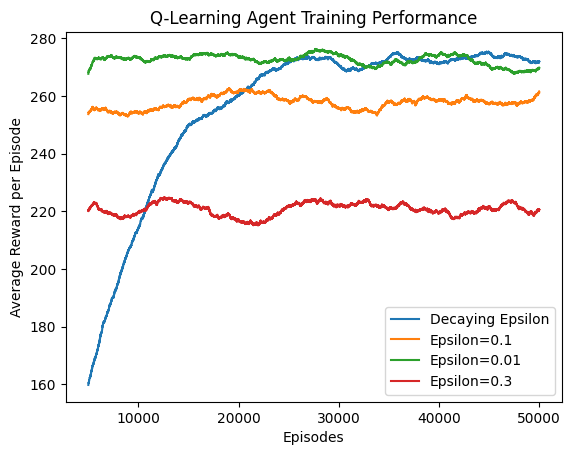

In [389]:
window_size = global_number_episodes // 10
weights = np.ones(window_size) / window_size
moving_avg_edec = np.convolve(average_reward_edec, weights, mode='valid')
episodes = np.arange(window_size, len(average_reward_edec) + 1)
plt.plot(episodes, moving_avg_edec, label='Decaying Epsilon')
plt.plot(episodes, moving_avg_01, label='Epsilon=0.1')
plt.plot(episodes, moving_avg_001, label='Epsilon=0.01')
plt.plot(episodes, moving_avg_03, label='Epsilon=0.3')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Average Reward per Episode')
plt.title('Q-Learning Agent Training Performance')

# REINFORCE LEARNING AGENT 

For the case where the number of decks is D < $\infty$ the problem becomes more complex; the state space is no longer just the value of the current hand, it now includes some history of the cards that have appeared. The method Q-learning will not be feasable since the state space will become too large when the number of decks is large. Instead we can use a policy gradient method since these make use of function approximation to map the state inputs to action probabilities.  

This function is effectively a linear model with a sigmoid function to give a probability of hitting or sticking, the training process will be using gradient acent (acent because we want to $\textbf{maximise}$ the reward) to update the parameters based on the reward throughout playing hands. 

We will need create a feature vector to represent the state space, for this case we will need 13 for how many of each each card type the agent has seen and 1 for the current value of the hand, there is 1 extra bias feature. So in total we will have a feature matrix of 15x1. 

We will create a parameterised policy, which is the linear model mentioned ealier. The models parameters will be updated according to:

$$\theta \to \theta + \alpha \gamma^{t}G\Delta_{\theta}log(A_t | S_t)$$

In [292]:
env = BlackjackEnv(D=1)
r_agent = ReinforceAgent(env)
print(env.playing_deck)

[('clubs', 7), ('spades', 7), ('diamonds', 1), ('spades', 6), ('spades', 13), ('diamonds', 7), ('hearts', 4), ('hearts', 5), ('clubs', 2), ('diamonds', 3), ('spades', 12), ('spades', 8), ('clubs', 10), ('diamonds', 10), ('diamonds', 8), ('clubs', 13), ('clubs', 5), ('clubs', 1), ('spades', 2), ('spades', 3), ('hearts', 2), ('hearts', 1), ('clubs', 11), ('hearts', 7), ('diamonds', 2), ('spades', 1), ('hearts', 13), ('diamonds', 6), ('hearts', 11), ('hearts', 10), ('hearts', 6), ('diamonds', 4), ('hearts', 12), ('spades', 10), ('hearts', 9), ('diamonds', 12), ('clubs', 12), ('hearts', 8), ('spades', 9), ('hearts', 3), ('clubs', 8), ('clubs', 6), ('diamonds', 13), ('spades', 11), ('clubs', 4), ('diamonds', 11), ('diamonds', 5), ('clubs', 9), ('spades', 4), ('clubs', 3), ('diamonds', 9), ('spades', 5)]


In [293]:
hand_trajectory = r_agent.play_hand_reinforce()

print(r_agent.env.player_hand)
print(r_agent.state)

print('Hand trajectory (state, action, reward):\n', hand_trajectory)

[('spades', 5), ('diamonds', 9)]
[0.66666667 0.         0.         0.         0.         1.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.        ]
Hand trajectory (state, action, reward):
 [(array([0.23809524, 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ]), 'hit', 0, False), (array([0.66666667, 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ]), 'stick', 196, True)]


In [294]:
final_traj = r_agent.run_episode()

final_state = final_traj[-1][0]
print('Final state of the episode:', final_state)

hand_values = [item[-1] for item in final_traj]
print('Hand values at the end of each hand in the episode:', hand_values)

Final state of the episode: [0.42857143 4.         4.         4.         4.         4.
 4.         4.         4.         4.         4.         4.
 4.         4.         1.        ]
Hand values at the end of each hand in the episode: [True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, False, False, True, False, True, False, True, False, False, True, True, False, False, True, False, False, True, False, True, False, True, False, True, False, False, True, False, True, False, False, True, True, False, True]


In [295]:
env = BlackjackEnv(D=1)
r_agent = ReinforceAgent(env)
episode_reward = r_agent.train_agent_vectorised(num_episodes=global_number_episodes, learning_rate=0.01, gamma=0.99, ADAM=False)

Text(0.5, 1.0, 'REINFORCE Agent Training Performance')

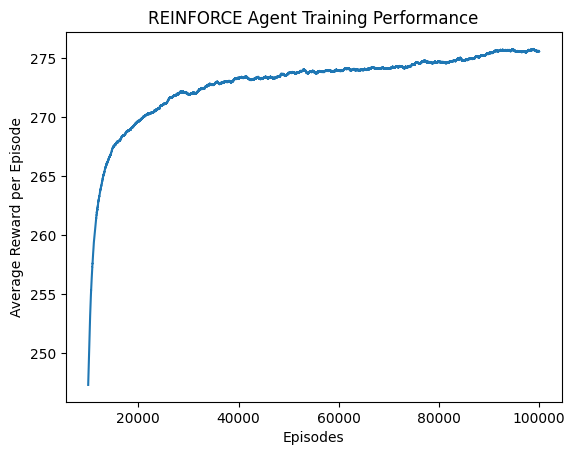

In [296]:
window_size = global_number_episodes // 10
weights = np.ones(window_size) / window_size
moving_avg = np.convolve(episode_reward, weights, mode='valid')
episodes = np.arange(window_size, len(episode_reward) + 1)
plt.plot(episodes, moving_avg)
plt.xlabel('Episodes')
plt.ylabel('Average Reward per Episode')
plt.title('REINFORCE Agent Training Performance')

Since this is now quite computationaly expensive, We will implement ADAM to try and decrease convergence time: 

ADAM implments two key ideas that both use moving averages: 

1. Momentum, updates the step direction based on the direction we have been traveling
2. Velocity, updates the step size based on the magniute of acent we have been doing

These will smooth out the learning process and allow the model to converge quicker 

Implemting them in this model involves modifying the update rule: 

currently: 

$$\theta \to \theta + \alpha g_t$$

with $g_t = \gamma^{t}G\Delta_{\theta}log(A_t | S_t)$ 

This $g_t$ is then used to calculate the moving averages stated earlier. These moving averages are then what will be used in the update rule. The moving averages are updated as follows: (initialised at 0)

Momentum: 

$$m_t \to \beta_{1}m_t + (1-\beta_1) g_t$$

Velocity: 

$$v_t \to \beta_2 v_t + (1-\beta_2)g_t^2$$

Since these are initialised to 0 at the start of training, we need to correct for this bias: 

$$\hat{m_t} = \frac{m_t}{1-\beta_1^t}$$

$$\hat{v_t} = \frac{v_t}{1-\beta_2^t}$$

The update rule then becomes: 

$$\theta \to \theta + \alpha \frac{\hat{m_t}}{\sqrt{\hat{v_t}} + \epsilon }$$





Note: With Adam we can set a higher learning rate for the same number of episodes, this would not work without since training would be too eratic. \
$\epsilon$ is just a small number > 0 to prevent division by 0 errors

The following code will test the agent using learning rates 0.1,0.01,0.001 with and without adam 

In [297]:
# time the difference between vectorised and non-vectorised and ADAM vs no ADAM

import time 
number_of_episodes = global_number_episodes

# ---- learning rate 0.1 ----
learning_rate = 0.1
# no ADAM 
env = BlackjackEnv(D=1)
r_agent = ReinforceAgent(env)
start_time = time.time()
episode_reward_01 = r_agent.train_agent_vectorised(num_episodes=number_of_episodes, learning_rate=learning_rate, gamma=0.99, ADAM=False)
print("Vectorised training time: %s seconds" % (time.time() - start_time))

env = BlackjackEnv(D=1)
r_agent_adam = ReinforceAgent(env)

start_time = time.time()
episode_reward_adam_01 = r_agent_adam.train_agent_vectorised(num_episodes=number_of_episodes, learning_rate=learning_rate,gamma=0.99,ADAM=True)
print("Vectorised ADAM training time: %s seconds" % (time.time() - start_time))

# ---- learning rate 0.01 ----
learning_rate = 0.01
# no ADAM 
env = BlackjackEnv(D=1)
r_agent = ReinforceAgent(env)
start_time = time.time()
episode_reward_001 = r_agent.train_agent_vectorised(num_episodes=number_of_episodes, learning_rate=learning_rate, gamma=0.99, ADAM=False)
print("Standard training time: %s seconds" % (time.time() - start_time))

env = BlackjackEnv(D=1)
r_agent_adam = ReinforceAgent(env)

start_time = time.time()
episode_reward_adam_001 = r_agent_adam.train_agent_vectorised(num_episodes=number_of_episodes, learning_rate=learning_rate,gamma=0.99,ADAM=True)
print(" ADAM training time: %s seconds" % (time.time() - start_time))

# ---- learning rate 0.01 ----
learning_rate = 0.01
# no ADAM 
env = BlackjackEnv(D=1)
r_agent = ReinforceAgent(env)
start_time = time.time()
episode_reward_001 = r_agent.train_agent_vectorised(num_episodes=number_of_episodes, learning_rate=learning_rate, gamma=0.99, ADAM=False)
print("Standard training time: %s seconds" % (time.time() - start_time))

env = BlackjackEnv(D=1)
r_agent_adam = ReinforceAgent(env)

start_time = time.time()
episode_reward_adam_001 = r_agent_adam.train_agent_vectorised(num_episodes=number_of_episodes, learning_rate=learning_rate,gamma=0.99,ADAM=True)
print(" ADAM training time: %s seconds" % (time.time() - start_time))

# ---- learning rate 0.001 ----
learning_rate = 0.001
# no ADAM
env = BlackjackEnv(D=1)
r_agent = ReinforceAgent(env)
start_time = time.time()
episode_reward_0001 = r_agent.train_agent_vectorised(num_episodes=number_of_episodes, learning_rate=learning_rate, gamma=0.99, ADAM=False)
print("Standard training time: %s seconds" % (time.time() - start_time))

env = BlackjackEnv(D=1)
r_agent_adam = ReinforceAgent(env)

start_time = time.time()
episode_reward_adam_0001 = r_agent_adam.train_agent_vectorised(num_episodes=number_of_episodes, learning_rate=learning_rate,gamma=0.99,ADAM=True)
print(" ADAM training time: %s seconds" % (time.time() - start_time))

Vectorised training time: 158.67176795005798 seconds
Vectorised ADAM training time: 305.9576699733734 seconds
Standard training time: 167.02494049072266 seconds
 ADAM training time: 184.66783475875854 seconds
Standard training time: 121.36648631095886 seconds
 ADAM training time: 180.7396318912506 seconds
Standard training time: 119.20681691169739 seconds
 ADAM training time: 172.75798630714417 seconds


Text(0.5, 1.0, 'REINFORCE Agent Training Performance')

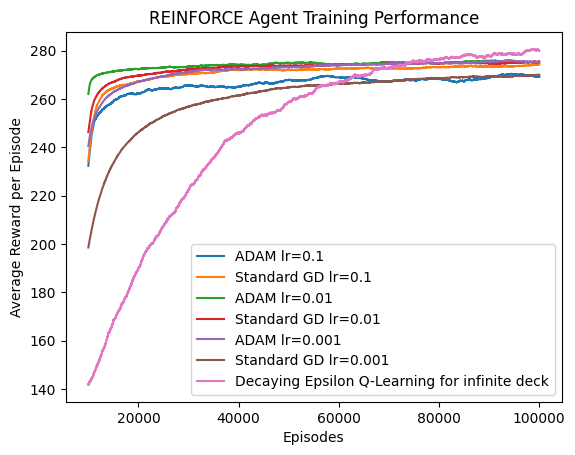

In [298]:
window_size = global_number_episodes // 10
weights = np.ones(window_size) / window_size

moving_avg_adam_01 = np.convolve(episode_reward_adam_01, weights, mode='valid')
moving_avg_01 = np.convolve(episode_reward_01, weights, mode='valid')

moving_avg_adam_001 = np.convolve(episode_reward_adam_001, weights, mode='valid')
moving_avg_001 = np.convolve(episode_reward_001, weights, mode='valid')

moving_avg_adam_0001 = np.convolve(episode_reward_adam_0001, weights, mode='valid')
moving_avg_0001 = np.convolve(episode_reward_0001, weights, mode='valid')

episodes = np.arange(window_size, len(episode_reward_0001) + 1)

plt.plot(episodes, moving_avg_adam_01)
plt.plot(episodes, moving_avg_01)
plt.plot(episodes, moving_avg_adam_001)
plt.plot(episodes, moving_avg_001)
plt.plot(episodes, moving_avg_adam_0001)
plt.plot(episodes, moving_avg_0001)
plt.plot(episodes, moving_avg_edec)

plt.legend(['ADAM lr=0.1','Standard GD lr=0.1','ADAM lr=0.01','Standard GD lr=0.01','ADAM lr=0.001','Standard GD lr=0.001','Decaying Epsilon Q-Learning for infinite deck'])
plt.xlabel('Episodes')
plt.ylabel('Average Reward per Episode')
plt.title('REINFORCE Agent Training Performance')

look at the weights of the model that REINFORCE USES 

In [299]:
print(r_agent_adam.weights)


[-3.83155355e+01  3.50561322e-01 -2.38969345e-02 -3.14577633e-02
 -3.68642850e-01 -5.39767995e-01 -3.20828789e-01 -2.38309915e-01
 -6.06014644e-02  3.19288794e-01  3.27468035e-02  3.42620575e-01
  3.31347844e-01  1.44724588e-01  2.51990749e+01]


# TODO

1. Figure out a way that the performance of the model can be evaluated, other than just rewards
2. Do some more visualisations: 
for finite:
     show how the model adapts to different deck textures (via weights). 
For infinite:
     represent the Q table more clearly so can see the cutoff point and such 
4. look into future improvements, for example a NN could be used instead of a LM for REINFORCE 

### MAYBE 
5. compare methods based on compuatation time/ look into compuatation time for the methods, time per episode for example. 
